# KNN y Redes Neuronales

## KNN

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    roc_curve, 
    roc_auc_score, 
    auc
)
from imblearn.over_sampling import RandomOverSampler

In [30]:
# Configuración para gráficos
sns.set(style="whitegrid")

In [31]:
#Leer archivo
cartera = pd.read_excel("carteraguia2017.xlsx")
print("Información inicial del DataFrame:")
print(cartera.info())
print("\nPrimeras filas:")
cartera.head()

Información inicial del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MESES                     852 non-null    int64  
 1   TIPO_ips                  852 non-null    int64  
 2   IGUAL_DUENO               852 non-null    int64  
 3   AGNOS_DIRECCION_ACTUAL    852 non-null    int64  
 4   VENTAS_MENS_PROMEDIO      852 non-null    int64  
 5   PORC_PASIVOS_VENTA_ANUAL  852 non-null    float64
 6   cartera_actual_insumos_A  852 non-null    float64
 7   cartera_actual_insumos_B  852 non-null    float64
 8   retrasos                  852 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 60.0 KB
None

Primeras filas:


,MESES,TIPO_ips,IGUAL_DUENO,AGNOS_DIRECCION_ACTUAL,VENTAS_MENS_PROMEDIO,PORC_PASIVOS_VENTA_ANUAL,cartera_actual_insumos_A,cartera_actual_insumos_B,retrasos
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [32]:
carterafin2=cartera.copy()

In [33]:
carterafin2 = pd.get_dummies(carterafin2, columns=['TIPO_ips'], drop_first=True)

In [34]:
carterafin2

,MESES,IGUAL_DUENO,AGNOS_DIRECCION_ACTUAL,VENTAS_MENS_PROMEDIO,PORC_PASIVOS_VENTA_ANUAL,cartera_actual_insumos_A,cartera_actual_insumos_B,retrasos,TIPO_ips_2,TIPO_ips_3,TIPO_ips_4,TIPO_ips_5
0,41,17,12,176,9.3,11.359392,5.008608,1,False,True,False,False
1,27,10,6,31,17.3,1.362202,4.000798,0,False,False,False,False
2,40,15,14,55,5.5,0.856075,2.168925,0,False,False,False,False
3,41,15,14,120,2.9,2.658720,0.821280,0,False,False,False,False
4,24,2,0,28,17.3,1.787436,3.056564,1,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
847,32,12,11,116,5.7,4.026708,2.585292,0,True,False,False,False
848,48,13,11,38,10.8,0.722304,3.381696,0,False,False,False,False
849,35,1,11,24,7.8,0.417456,1.454544,0,True,False,False,False
850,37,20,13,41,12.9,0.899130,4.389870,0,False,False,False,False


In [35]:
X=carterafin2.drop('retrasos', axis=1)
y=carterafin2['retrasos']

In [37]:
# Train y test
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=12548)

In [42]:
#Estandarizar
scaler=StandardScaler()

X_train =scaler.fit_transform(X_train)
X_test =scaler.fit_transform(X_test)

### Entremiento

In [ ]:
# Modelo base
knn = KNeighborsClassifier()

# Crear grid
grid = {'n_neighbors': list(range(1,50))}

#Validación cruzada
grid_search_knn_V1=GridSearchCV(
    estimator=knn,
    param_grid=grid,
    scoring='accuracy',
    cv=10
)

grid_search_knn_V1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [47]:
grid_search_knn_V1.best_params_

{'n_neighbors': 10}

In [48]:
grid_search_knn_V1.best_score_

np.float64(0.810613810741688)

In [50]:
y_predict_knn_V1=grid_search_knn_V1.predict(X_test)
y_predict_knn_V1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
cm_V1=confusion_matrix(y_test, y_predict_knn_V1 )
print(cm_V1)

[[131   6]
 [ 21  13]]


In [54]:
print(classification_report(y_test, y_predict_knn_V1 ))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       137
           1       0.68      0.38      0.49        34

    accuracy                           0.84       171
   macro avg       0.77      0.67      0.70       171
weighted avg       0.83      0.84      0.82       171



In [ ]:
#Calcular AUC
roc_auc_score(y_test, y_predict_knn_V1 )

np.float64(0.6692786603692572)

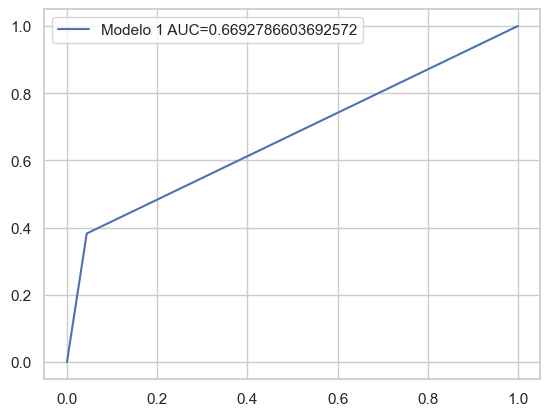

In [60]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_predict_knn_V1)

plt.plot(fpr1, tpr1, label=f'Modelo 1 AUC={roc_auc_score(y_test, y_predict_knn_V1 )}')
plt.legend()


## Deep Learning

Videos explicativos:
- https://www.youtube.com/watch?v=aircAruvnKk
- https://www.youtube.com/watch?v=jaEIv_E29sk


Una red neuronal es un modelo computacional inspirado en el cerebro humano, diseñado para reconocer patrones y aprender de los datos. Está compuesta por unidades llamadas "neuronas artificiales", organizadas en capas:

- Capa de entrada: recibe los datos iniciales (como una imagen, texto o número).
- Capas ocultas: procesan la información mediante conexiones ponderadas.
- Capa de salida: produce el resultado final (por ejemplo, clasificar una imagen como gato o perro).

Estas redes se entrenan ajustando las conexiones internas para minimizar errores en las predicciones, un proceso conocido como "aprendizaje supervisado".

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import matplotlib.pyplot as plt
import numpy as np

### 1. Descarga de información

La información del Fashion MNIST se encuentra como uno de los DataSets disponibles dentro de TensorFlow. Es posible llamarlo utilizando tf.keras.datasets.fashion_mnist. Se puede consultar el resto de conjuntos de datos disponibles en la documentación de TensorFLow.

A continuación, cargue la información de Fashion MNIST.

In [63]:
# Carga de FashionMNIST

###
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

###

In [64]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [67]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

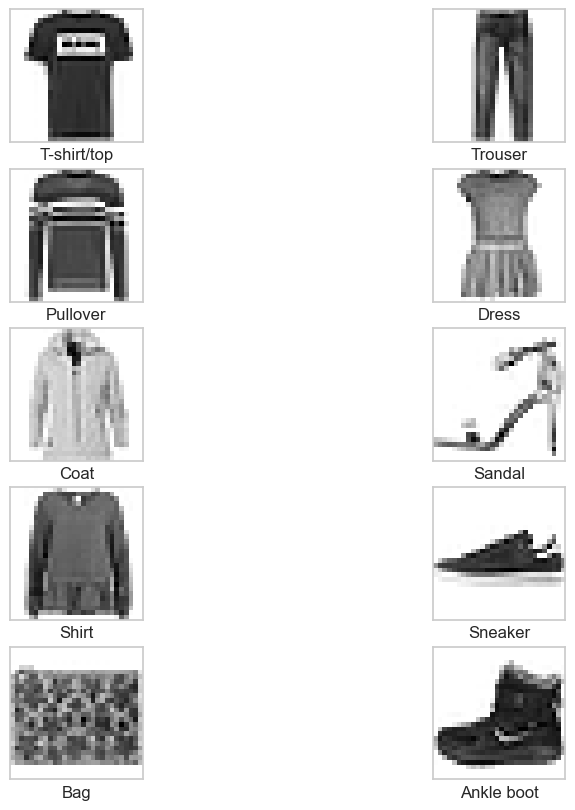

In [66]:
category_indices = [np.where(y_train == i)[0][0] for i in range(10)]
category_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# Plot examples
plt.figure(figsize=(10, 10))
for i, index in enumerate(category_indices):
    plt.subplot(5, 2, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[index]))


    plt.xlabel(category_labels[y_train[index]])
plt.show()

In [69]:
x_train.shape

(60000, 28, 28)

In [70]:
x_train[0, :, :].min()

np.uint8(0)

In [71]:
x_train[0, :, :].max()

np.uint8(255)

In [72]:
# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [73]:
x_train.shape[0]

60000

In [77]:
def show_random_examples(model, x, y, num_examples=10):
    """
    Selección aleatoria de ejemplos y predicciones.

    Params:
    ---------
      model (tf.keras.Model):
        Modelo de Red Neuronal para predicciones

      x (numpy.array):
        Numpy Array con pixeles de la ropa

      y (numpy.array):
        Numpy Array indicando categoría

    """
    # Muestra Aleatorio de índices
    indices = np.random.choice(range(x.shape[0]), num_examples)

    # Obtención de Imágenes y Categorías de Verdad
    images = x[indices]
    true_labels = y[indices]

    # Generar Predicciones del Modelo
    predictions = model.predict(images) # El modelo predice probabilidades
    predicted_labels = np.argmax(predictions, axis=-1) # Se requiere obtener la categoría que maximice esas probabilidad
    predicted_probs = np.max(predictions, axis=-1) # Selección de Probabilidad de categoría ganadora

    # Display the images, true labels, and predicted labels
    plt.figure(figsize=(10, 5))
    for i, (img, true_label, pred_label, prob) in enumerate(zip(images, true_labels, predicted_labels, predicted_probs)):
        plt.subplot(2, num_examples // 2, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')

        title_color = 'red' if true_label != pred_label else 'black'
        plt.title(f"True: {category_labels[true_label]}\nPredicted: {category_labels[pred_label]} ({prob:.2f})", fontsize=10, color=title_color)
    plt.tight_layout()
    plt.show()

# Call the function to display random examples and their classifications

### 2. Definición del Modelo
A continuación tendrá que definir un modelo de red neuronal como usted considere. Para esto, tiene a su disposición las capas Densas (fully connected layers) que se encuentran en tf.keras.layers.Dense. Siéntase libre de explorar con la cantidad de capas ocultas, la cantidad de neuronas, las funciones de activación, etc...

Nota: Recuerde que existen 10 categorías de predicción, por lo que debe escoger adecuadamente el número de neuronas de la capa final y la función de activación de la misma. Puede ver las funciones de activación disponibles en la documentación de TensorFlow.

In [76]:
### Defina el modelo inicial

model = Sequential([
    Flatten(input_shape=(28, 28)), # No borrar esta
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

###

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


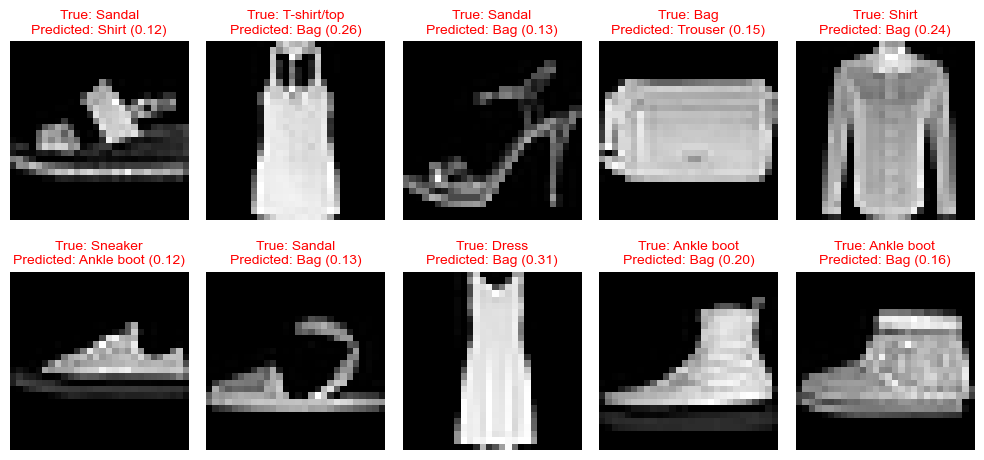

In [79]:
### Utilice la función show_random_examples para mostrar las predicciones en algunos ejemplos en Test
show_random_examples(model, x_train, y_train)
###

Para entrenar el modelo, es necesario definir cuál es el objetivo y cómo se desea hacer. Es por esto que se requiere compilar el modelo utilizando el método compile del API de Tensorflow.

En este debe definir qué optimizador utilizar, cuál es la función a minimizar y qué métricas de seguimiento se van a evaluar.

Nota: Debido al formato de los datos, se utilizará la función de pérdida SparseCategoricalCrossentropy e igualmente la SparseCategoricalAccuracy.

Nota 2: Se recomienda utilizar Adam como el optimizador, pero se recomienda probar los otros optimizadores disponibles en la documentación de TensorFlow.

In [81]:
### Compile el modelo utilizando Sparce Categorical Crossentropy y Accuracy
model.compile(
    optimizer=Adam(learning_rate=0.001), ## Pruebe otros Optimizadores
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

###

### 3. Entrenamiento de Modelo

Una vez definida la estructura del modelo y el objetivo de entrenamiento, se puede proceder a entrenar. Se utilizará el método fit del modelo. Pruebe probar otros batchsizes.

In [82]:
model_history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5048 - sparse_categorical_accuracy: 0.8201 - val_loss: 0.3941 - val_sparse_categorical_accuracy: 0.8540
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3730 - sparse_categorical_accuracy: 0.8628 - val_loss: 0.3595 - val_sparse_categorical_accuracy: 0.8694
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3358 - sparse_categorical_accuracy: 0.8762 - val_loss: 0.3792 - val_sparse_categorical_accuracy: 0.8629
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3133 - sparse_categorical_accuracy: 0.8826 - val_loss: 0.3427 - val_sparse_categorical_accuracy: 0.8781
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2928 - sparse_categorical_accuracy: 0.8897 - val_loss: 0.3224 - val_sparse_categorical_accuracy: 0.8852
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2780 - sparse_categorical_accuracy: 0.8967 - val_loss: 0.3707 - val_sparse_categorical_accuracy:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


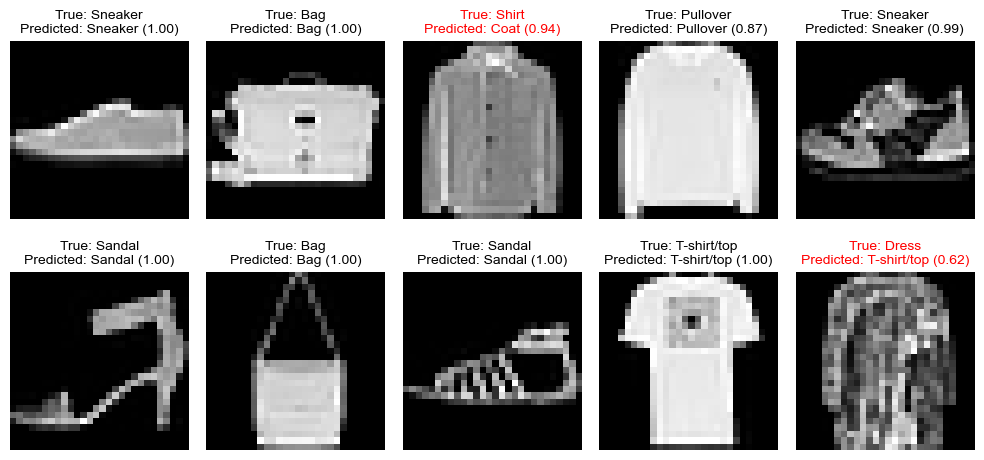

In [93]:
show_random_examples(model, x_test, y_test)

In [20]:
###
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

###

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3348 - sparse_categorical_accuracy: 0.8858
Test accuracy: 0.8858000040054321


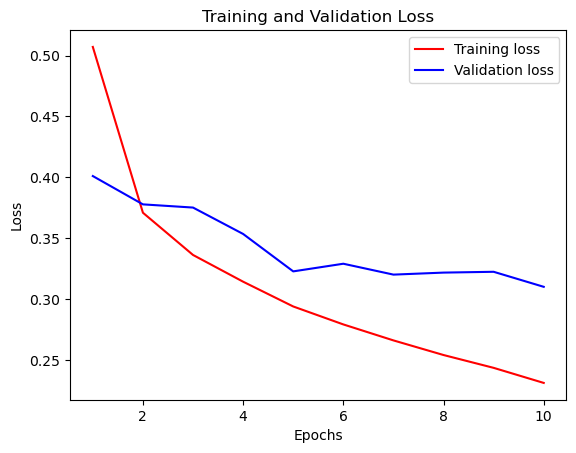

In [21]:
def plot_training_and_validation_loss(model_history):
    loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

# Call the function to plot the training and validation loss
plot_training_and_validation_loss(model_history)